# Das Newton-Verfahren

Das Newton Verfahren kann einen Funktionswert minimieren. Dazu wird ein Startwert iterativ verbessert. Es bricht ab, wenn ein gegebenes $\epsilon$ unterschritten wird. Es kann allerdings vorkommen, dass das Verfahren nicht konvergiert.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Zu untersuchende Funktionen:

In [2]:
def f1(x):
    return 5*x**2 + 3*x - 0.1

In [3]:
def f2(x):
    return 0.5*x**2+2*x-1

In [4]:
def f3(x):
    return x**3 - 2*x + 2

In [5]:
def f4(x):
    return pow(x,1.0/3.0)

In [6]:
def f5(x):
    return (x**(1.0/3.0)).real

Das Newton-Verfahren benötigt die 1. Ableitung der zu untersuchenden Funktion:

In [7]:
def df1(x):
    return 10*x + 3

In [8]:
def df2(x):
    return x+2

In [9]:
def df3(x):
    return 3*x**2 - 2

In [10]:
def df4(x):
    return (1.0/3.0)*pow(x,-2.0/3.0)

In [11]:
def df5(x):
    return ((1.0/3.0)*x**(-2.0/3.0)).real

bestimmte Abbruchbedingungen führen zu Exeptions:

In [12]:
class DFZeroError(ValueError):
    "raise this when F' is 0"

In [13]:
class MaxIterationsError(ValueError):
    "raise this when reached maximum iterations"

Das Newton-Verfahren:
Zu beachten ist, dass bei df = 0 das Verfahren abbricht.

In [14]:
def f(x):
    return f1(x)

In [15]:
def df(x):
    return df1(x)

In [16]:
def newton(xn):
    #                         f(xn)
    # calculate  xn+1 = xn - --------
    #                         f'(xn)
    den = df(xn)
    if den == 0:
        raise DFZeroError('dF is Zero for {0:f}. Maybe start with another x0.'.format(xn))
    xnp1 = xn - f(xn)/den
    return xnp1

In [17]:
def setupPlot():

    # change size of the plot (must be done BEFORE the first plot):
    fig = plt.figure(figsize=(20,10))
    
    ax = plt.gca()

    centerx = 0
    centery = 0
    ax.spines['left'].set_position(('data', centerx))
    ax.spines['bottom'].set_position(('data', centery))
    ax.spines['right'].set_position(('data', centerx))
    ax.spines['top'].set_position(('data', centery))


    for axis, center in zip([ax.xaxis, ax.yaxis], [centerx, centery]):
        # Turn on minor and major gridlines and ticks
        axis.set_ticks_position('both')
        axis.grid(True, 'major', ls='solid', lw=0.5, color='gray')
        axis.grid(True, 'minor', ls='solid', lw=0.1, color='gray')
        axis.set_minor_locator(mpl.ticker.AutoMinorLocator())

        # Hide the ticklabels at <centerx, centery>
        # formatter = CenteredFormatter()
        # formatter.center = center
        # axis.set_major_formatter(formatter)

In [18]:
setupPlot()

In [19]:
# max n iterations
maxIterations = 20

In [20]:
# stop if |(xn+1)-(xn)| < eps
eps = 0.0000001

In [21]:
# initial value
x0 = 1

In [22]:
def doNewton():
    xnp1 = x0
    for i in range(1, maxIterations):
        xn = xnp1
        xnp1 = newton(xn)

        print("xn = {0:.8f}\tf(xn) = {1:.8f}\tf'(xn) = {2:.8f}\txnp1 = {3:.8f}".format(xn, f(xn), df(xn), xnp1))

        m = (f(xn)-0) / (xn-xnp1)
        b = -m * xnp1
        print("\tm = {0:.8f}\tb = {1:.8f}".format(m, b))

        plt.plot(x, m*x+b, 'r:')
        plt.plot(xn, 0, 'kx')
        plt.plot(xn, f(xn), 'kx')
        plt.plot(xnp1, 0, 'kx')
        plt.plot(xnp1, f(xnp1), 'kx')

        if (abs(xn-xnp1) < eps):
            print("below eps")
            return

    raise MaxIterationsError('max Iterations reached, possibly not converging ?')

In [23]:
# x axis
x = np.arange(0,1.2,0.01)

In [24]:
# draw graph
plt.plot(x, f(x))

In [25]:
doNewton()

xn = 1.00000000	f(xn) = 7.90000000	f'(xn) = 13.00000000	xnp1 = 0.39230769
	m = 13.00000000	b = -5.10000000
xn = 0.39230769	f(xn) = 1.84644970	f'(xn) = 6.92307692	xnp1 = 0.12559829
	m = 6.92307692	b = -0.86952663
xn = 0.12559829	f(xn) = 0.35566952	f'(xn) = 4.25598291	xnp1 = 0.04202899
	m = 4.25598291	b = -0.17887465
xn = 0.04202899	f(xn) = 0.03491914	f'(xn) = 3.42028988	xnp1 = 0.03181958
	m = 3.42028988	b = -0.10883218
xn = 0.03181958	f(xn) = 0.00052116	f'(xn) = 3.31819578	xnp1 = 0.03166252
	m = 3.31819578	b = -0.10506243
xn = 0.03166252	f(xn) = 0.00000012	f'(xn) = 3.31662516	xnp1 = 0.03166248
	m = 3.31662516	b = -0.10501257
below eps


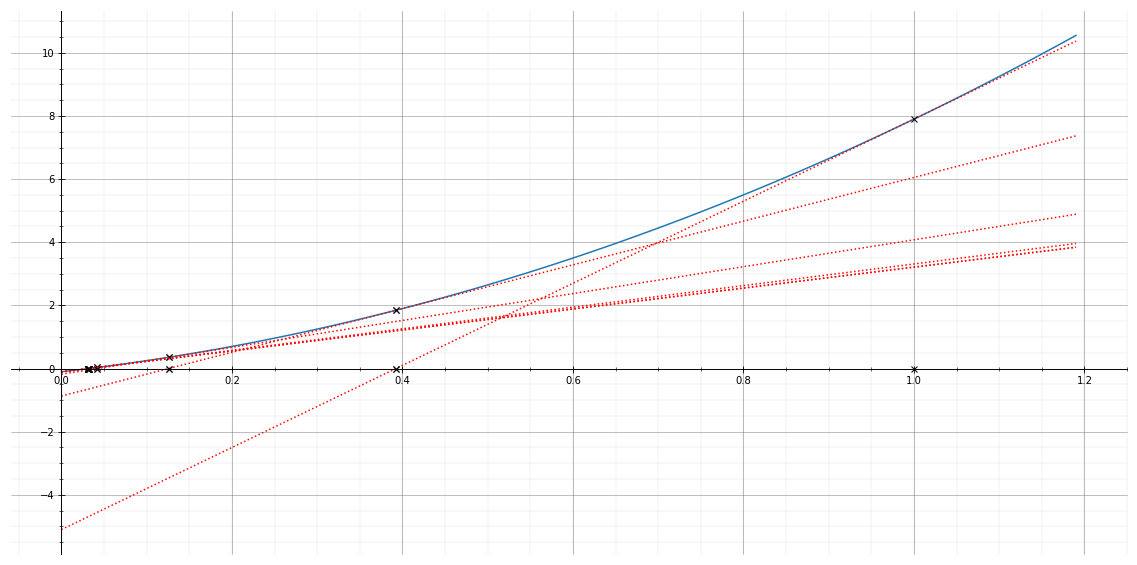

In [26]:
plt.show()